# Import the library and datasets

In [16]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

# It has 1797 samples and 64 features

# Clustering part

In [17]:
kmeans = KMeans(n_clusters=10)
cluster = kmeans.fit(digits.data)
clusters = kmeans.predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

# First fitted the cluster then used the predict method on the dataset. The result is 10 clusters in 64 dimensions.

# Finding out the cluster centers

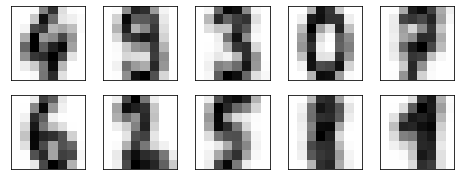

In [18]:
fig,ax = plt.subplots(2,5,figsize = (8,3))
centers = kmeans.cluster_centers_.reshape(10,8,8)
for axi,center in zip(ax.flat,centers):
    axi.set(xticks=[],yticks=[])
    axi.imshow(center,interpolation='nearest',cmap = plt.cm.binary)

# without the labels, KMeans can find clusters whose centers are recognizable digits, with the exception of 1 and 8

# As the identity of the cluster is unknown, the labels maybe permuted. By matching each learned cluster label with the correct names we can fix this.

In [19]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# Now we check the accuracy of the clustering

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7929883138564274

# We can see with just a simple k-means algorithm we correctly discovered 80% of the input digits

# Creating the confusion matrix

Text(91.68, 0.5, 'predicted label')

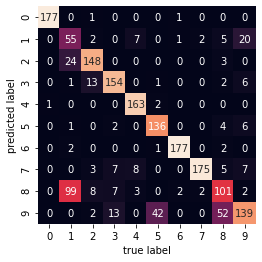

In [21]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True,fmt='d',cbar=False, 
             xticklabels = digits.target_names,
              yticklabels = digits.target_names)

plt.xlabel('true label')
plt.ylabel('predicted label')